<a href="https://colab.research.google.com/github/NataliaKolesnik/Car_Price_prediction_part2/blob/master/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
path_data = '/content/drive/MyDrive/SF_project_8/data/'

##Библиотеки

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [30]:
FONT_TITLE = 25
FONT_LABEL = 15

## Осмотр данных

In [19]:
df_train = pd.read_csv(path_data+'train.csv')
df_test = pd.read_csv(path_data+'test.csv')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              6682 non-null   object 
 1   brand                 6682 non-null   object 
 2   color                 6682 non-null   object 
 3   description           6682 non-null   object 
 4   engineDisplacement    6682 non-null   object 
 5   enginePower           6682 non-null   object 
 6   fuelType              6682 non-null   object 
 7   mileage               6682 non-null   int64  
 8   modelDate             6682 non-null   int64  
 9   model_info            6682 non-null   object 
 10  name                  6682 non-null   object 
 11  numberOfDoors         6682 non-null   int64  
 12  price                 6682 non-null   float64
 13  productionDate        6682 non-null   int64  
 14  sell_id               6682 non-null   int64  
 15  vehicleConfiguration 

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              1671 non-null   object
 1   brand                 1671 non-null   object
 2   color                 1671 non-null   object
 3   description           1671 non-null   object
 4   engineDisplacement    1671 non-null   object
 5   enginePower           1671 non-null   object
 6   fuelType              1671 non-null   object
 7   mileage               1671 non-null   int64 
 8   modelDate             1671 non-null   int64 
 9   model_info            1671 non-null   object
 10  name                  1671 non-null   object
 11  numberOfDoors         1671 non-null   int64 
 12  productionDate        1671 non-null   int64 
 13  sell_id               1671 non-null   int64 
 14  vehicleConfiguration  1671 non-null   object
 15  vehicleTransmission   1671 non-null   

**Наличие пропусков**

In [21]:
# В обучающей выборке
df_train.isna().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
price                      0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  1
Владение                4326
ПТС                        0
Привод                     0
Руль                       0
dtype: int64

In [12]:
# В тестовой выборке
df_test.isna().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  0
Владение                1092
ПТС                        0
Привод                     0
Руль                       0
dtype: int64

В обучающей выборке 6682 объектов, в тестовой - 1671.

Пропуски содержаться в признаке Владение (порядка 65%). Так же одно пропущенное значение в обучающей выборке в признаке Владельцы.


## **Данные:** 

**bodyType** - тип кузова (категориальный)  
**brand** - марка автомобиля (категориальный)  
**color** - цвет автомобиля (категориальный)             
**description** - описание автомобиля, составленное владельцем объявления (текст)   
**engineDisplacement** - объем двигателя (числовой float)  
**enginePower** - двигатель (категориальный)   
**fuelType** - тип топлива (категориальный)   
**mileage** - пробег (числовой int)   
**modelDate** - год начала производства модели (числовой int)   
**model_info** - модель авто (категориальный)  
**name** - краткая информация об авто (текст)  
**numberOfDoors** - количество дверей (числовой int)   
**price** - цена (числовой float) - target   
**productionDate** - год выпуска авто (числовой int)   
**sell_id** - id объявления (числовой int)  
**vehicleConfiguration** - конфигурация автомобиля  
**vehicleTransmission**  - трансмиссия (категориальный)   
**Владельцы** - количество владельцев (категориальный ранговый)   
**Владение** - срок владения (текст)  
**ПТС** - оригинал или дубликат (категориальный)   
**Привод** - тип привода (категориальный)    
**Руль** - с какой стороны (категориальный)            

## Анализ и обработка данных

In [23]:
df_train['bodyType'].value_counts()

седан                   2843
внедорожник 5 дв.       2315
купе                     427
хэтчбек 5 дв.            296
лифтбек                  245
универсал 5 дв.          153
минивэн                  146
купе-хардтоп              91
родстер                   60
кабриолет                 44
хэтчбек 3 дв.             41
компактвэн                 8
лимузин                    5
внедорожник 3 дв.          3
пикап двойная кабина       2
внедорожник открытый       2
седан 2 дв.                1
Name: bodyType, dtype: int64

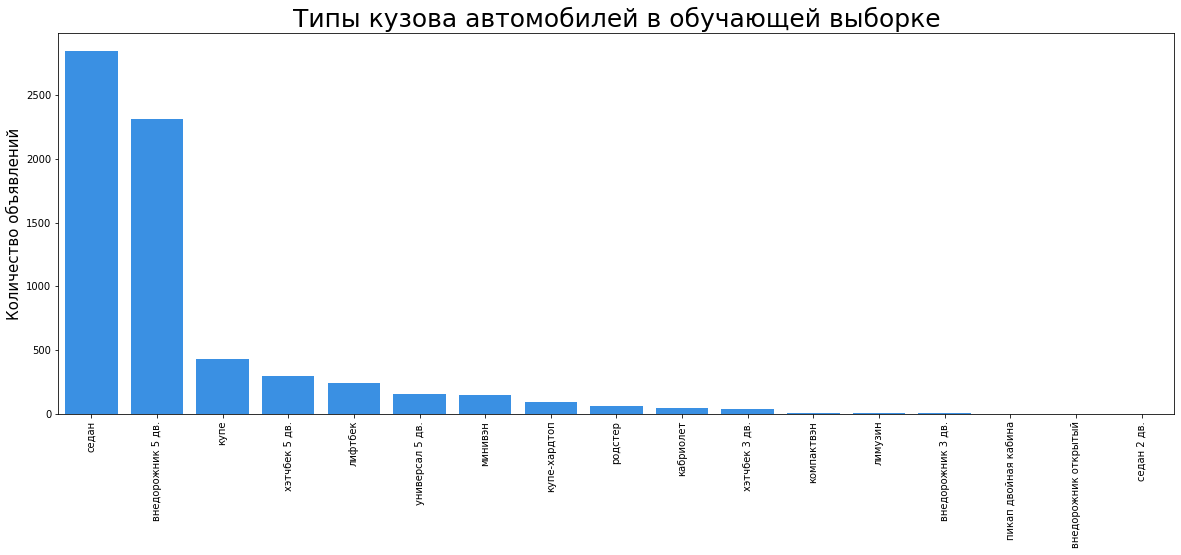

In [41]:
plt.figure(figsize=(20,7))
plt.title('Типы кузова автомобилей в обучающей выборке', fontsize=FONT_TITLE)
sns.countplot(x='bodyType', data=df_train,  color='dodgerblue',
              order=df_train['bodyType'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Количество объявлений', fontsize=FONT_LABEL)
plt.xlabel('')
plt.show()

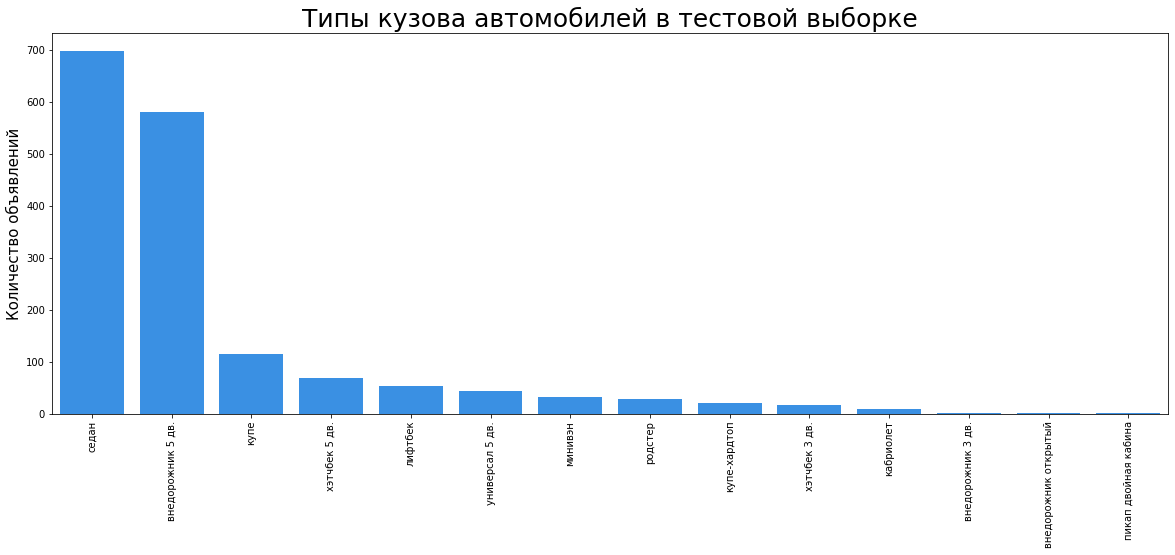

In [42]:
plt.figure(figsize=(20,7))
plt.title('Типы кузова автомобилей в тестовой выборке', fontsize=FONT_TITLE)
sns.countplot(x='bodyType', data=df_test,  color='dodgerblue',
              order=df_test['bodyType'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Количество объявлений', fontsize=FONT_LABEL)
plt.xlabel('')
plt.show()

Типы кузова распределены очень неравномерно. Большинство - седан и внедорожник 5 дверей. Есть смежные, которые отличаются количеством дверей, возможно их лучше бъединить в одну категорию (так как их количество на всю выборку очень мало от 1 до 8.

In [49]:
def body_type_processing(body_type):
    body_type = re.sub(' \d дв.', '', body_type)
    if 'внедорожник' in body_type or 'пикап' in body_type:
        return 'внедорожник'
    elif 'компактвэн' in body_type:
        return 'минивэн'
    else:
        return body_type

df_train['bodyType'] = df_train['bodyType'].apply(lambda s: body_type_processing(s))
df_test['bodyType'] = df_test['bodyType'].apply(lambda s: body_type_processing(s))     

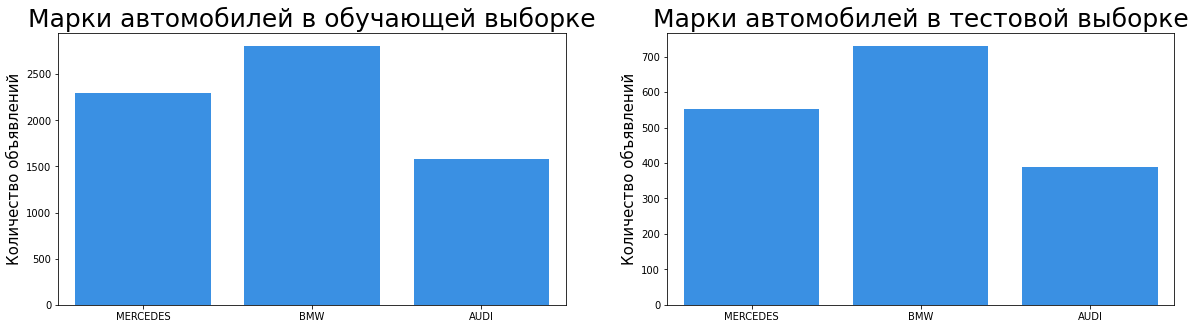

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].set_title('Марки автомобилей в обучающей выборке', fontsize=FONT_TITLE)
sns.countplot(ax=ax[0], x='brand', data=df_train,  color='dodgerblue', order=df_test['brand'].unique())
ax[0].set_ylabel('Количество объявлений', fontsize=FONT_LABEL)
ax[0].set_xlabel('')

ax[1].set_title('Марки автомобилей в тестовой выборке', fontsize=FONT_TITLE)
sns.countplot(ax=ax[1], x='brand', data=df_test,  color='dodgerblue', order=df_test['brand'].unique())
ax[1].set_ylabel('Количество объявлений', fontsize=FONT_LABEL)
ax[1].set_xlabel('')


# plt.xticks(rotation=90)
# plt.ylabel('Количество объявлений', fontsize=FONT_LABEL)
# plt.xlabel('')
plt.show()

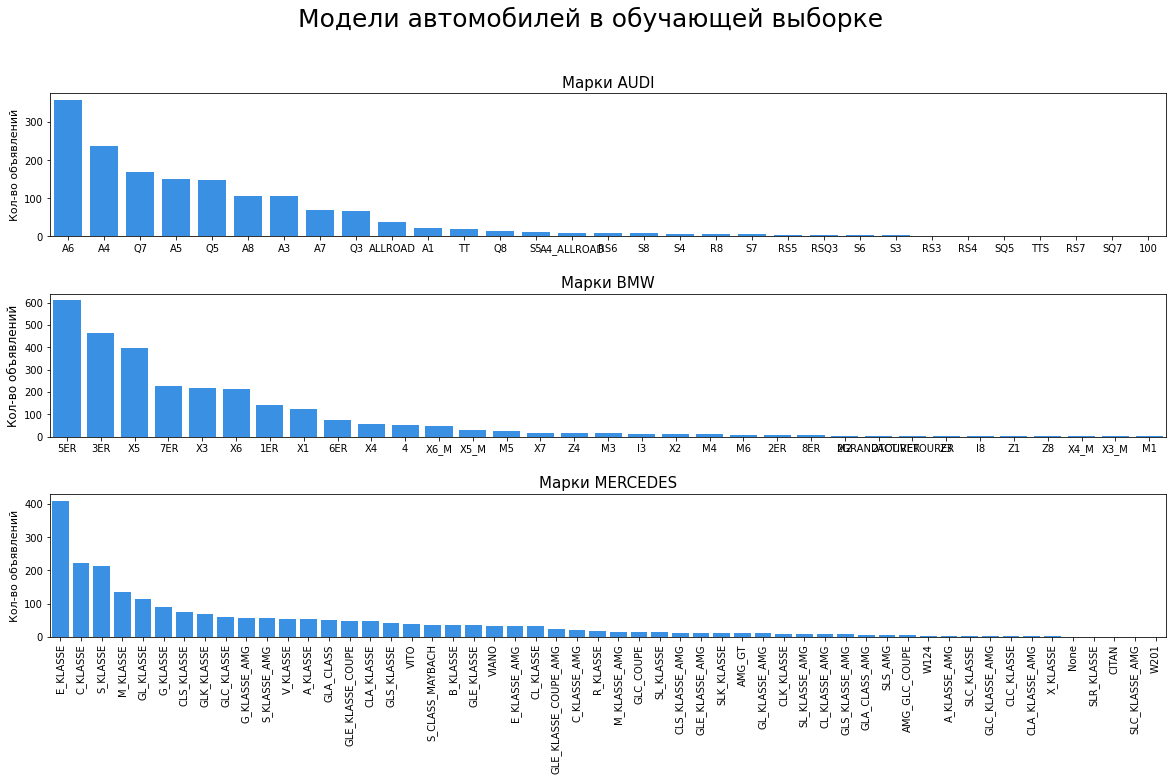

In [75]:
fig, ax = plt.subplots(3, 1, figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Модели автомобилей в обучающей выборке', y=1.0, fontsize=FONT_TITLE)

ax[0].set_title('Марки AUDI', fontsize=FONT_LABEL)
sns.countplot(ax=ax[0], x='model_info', data=df_train[df_train['brand']=='AUDI'],  color='dodgerblue', 
              order=df_train[df_train['brand']=='AUDI']['model_info'].value_counts().index)
ax[0].set_ylabel('Кол-во объявлений', fontsize=FONT_LABEL-3)
ax[0].set_xlabel('')

ax[1].set_title('Марки BMW', fontsize=FONT_LABEL)
sns.countplot(ax=ax[1], x='model_info', data=df_train[df_train['brand']=='BMW'],  color='dodgerblue', 
              order=df_train[df_train['brand']=='BMW']['model_info'].value_counts().index)
ax[1].set_ylabel('Кол-во объявлений', fontsize=FONT_LABEL-3)
ax[1].set_xlabel('')

ax[2].set_title('Марки MERCEDES', fontsize=FONT_LABEL)
sns.countplot(ax=ax[2], x='model_info', data=df_train[df_train['brand']=='MERCEDES'],  color='dodgerblue', 
              order=df_train[df_train['brand']=='MERCEDES']['model_info'].value_counts().index)
ax[2].set_ylabel('Кол-во объявлений', fontsize=FONT_LABEL-3)
ax[2].set_xlabel('')
plt.xticks(rotation=90)

plt.show()

In [67]:
# Есть 4 модели в тестовой выборке, которые отсутвуют в обучающей
set(df_test['model_info'].unique()) - set(df_train['model_info'].unique())

{'COUPE', 'SLK_KLASSE_AMG', 'W123', 'Z3M'}

In [64]:
df_train.iloc[305]

bodyType                                                      внедорожник
brand                                                            MERCEDES
color                                                               белый
description             Год выпуска: 2009. Пробег: 230 000 км. Кузов: ...
engineDisplacement                                                3.0 LTR
enginePower                                                       231 N12
fuelType                                                           бензин
mileage                                                            230000
modelDate                                                            2008
model_info                                                     GLK_KLASSE
name                                            280 3.0 AT (231 л.с.) 4WD
numberOfDoors                                                           5
price                                                            699000.0
productionDate                        